# Practice notebook for confidence intervals using NHANES data

This notebook will give you the opportunity to practice working with confidence intervals using the NHANES data.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

df = pd.read_csv("nhanes_2015_2016.csv")

## Question 1

Restrict the sample to women between 35 and 50, then use the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to partition this sample into two groups - women who are currently married, and women who are not currently married.  Within each of these groups, calculate the proportion of women who have completed college.  Calculate 95% confidence intervals for each of these proportions.

In [23]:
# enter your code here
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [24]:
#restricting the sample to only feamle(2)
mask = df["RIAGENDR"] == 2
#setting the new data sample as the new data frame
df = df[mask]
df["RIAGENDR"] #Confirming that gender column contains only female(2)

3       2
4       2
5       2
7       2
12      2
       ..
5724    2
5727    2
5730    2
5732    2
5734    2
Name: RIAGENDR, Length: 2976, dtype: int64

In [25]:
#Setting age limit between 35 and 50 for the new data frame
mask = (df["RIDAGEYR"] >= 35) & (df["RIDAGEYR"] <= 50)
df = df[mask]
df["RIDAGEYR"] #Confirming the age range

4       42
34      37
50      39
52      50
55      45
        ..
5658    46
5685    36
5689    44
5721    35
5724    41
Name: RIDAGEYR, Length: 787, dtype: int64

In [26]:
#Dividing the DMDMARTL column into married(1.0) and  unmarried(others)
df.loc[:,"DMDMARTL"] = df["DMDMARTL"].replace([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 77.0, 99.0], ["married", "unmarried", "unmarried", "unmarried", "unmarried", "unmarried", "unmarried", "unmarried"])
df["DMDMARTL"] #Confirming the grouping

4       unmarried
34        married
50        married
52      unmarried
55        married
          ...    
5658    unmarried
5685      married
5689      married
5721    unmarried
5724      married
Name: DMDMARTL, Length: 787, dtype: object

In [27]:
#Grouping the DMDEDUC2 column into college_graduate and not_graduate
df.loc[:,"DMDEDUC2"] = df["DMDEDUC2"].replace([1.0, 2.0, 3.0, 4.0, 5.0, 9.0],["not_graduate", "not_graduate", "not_graduate", "not_graduate", "college_graduate", "not_graduate"])
df["DMDEDUC2"] #confirming the grouping

4           not_graduate
34          not_graduate
50          not_graduate
52          not_graduate
55          not_graduate
              ...       
5658        not_graduate
5685    college_graduate
5689        not_graduate
5721    college_graduate
5724    college_graduate
Name: DMDEDUC2, Length: 787, dtype: object

In [29]:
pd.crosstab(df.DMDMARTL, df.DMDEDUC2)

DMDEDUC2,college_graduate,not_graduate
DMDMARTL,,
married,162,287
unmarried,72,266


In [34]:
da = df.groupby(df.DMDEDUC2).agg({"DMDMARTL": [lambda x: np.mean(x=="married"), np.size]})
da.columns = ["Proportion", "Total_number"] 
da

,Proportion,Total_number
DMDEDUC2,,
college_graduate,0.692308,234
not_graduate,0.518987,553


In [35]:
da = df.groupby(df.DMDEDUC2).agg({"DMDMARTL": [lambda x: np.mean(x=="unmarried"), np.size]})
da.columns = ["Proportion", "Total_number"] 
da

,Proportion,Total_number
DMDEDUC2,,
college_graduate,0.307692,234
not_graduate,0.481013,553


In [36]:
# 95% CI for the proportion of married graduate  female within 35-50 age range
sm.stats.proportion_confint(162, 162+287)  

(0.31638193710753626, 0.4052216263668512)

In [37]:
# 95% CI for the proportion of  unmarried graduate female within 35-50 age range
sm.stats.proportion_confint(72, 72+266)  

(0.16936816767089768, 0.2566673352876822)

__Q1a.__ Identify which of the two confidence intervals is wider, and explain why this is the case. 

In [ ]:
#The CI for married graduate is a bit wider because it has bigger sample size

__Q1b.__ Write 1-2 sentences summarizing these findings for an audience that does not know what a confidence interval is (the goal here is to report the substance of what you learned about how marital status and educational attainment are related, not to teach a person what a confidence interval is).

In [ ]:
#There is 95% assurance that between 32% and 41% of the married female within the age range 35-50 are college graduates
#And 17% to 26% of the unmarried are college graduates.

## Question 2

Construct 95% confidence intervals for the proportion of smokers who are female, and for the proportion of smokers who are male.  Then construct a 95% confidence interval for the difference between these proportions.

In [54]:
df = pd.read_csv("nhanes_2015_2016.csv")

In [55]:
# enter your code here
df.loc[:,"SMQ020"] = df.SMQ020.replace({1: "Yes", 2: "No", 7: np.nan, 9: np.nan})  
df.loc[:,"RIAGENDR"] = df.RIAGENDR.replace({1: "Male", 2: "Female"})

In [56]:
da = df[["SMQ020", "RIAGENDR"]].dropna()  
pd.crosstab(da.SMQ020, da.RIAGENDR)

RIAGENDR,Female,Male
SMQ020,,
No,2066,1340
Yes,906,1413


In [58]:
db = da.groupby(da.RIAGENDR).agg({"SMQ020": [lambda x: np.mean(x=="Yes"), np.size]})
db.columns = ["Proportion", "Total_n"] 
db

,Proportion,Total_n
RIAGENDR,,
Female,0.304845,2972
Male,0.513258,2753


In [59]:
# 95% CI for the proportion of female smokers
sm.stats.proportion_confint(906, 906+2066)  

(0.2882949879861214, 0.32139545615923526)

In [60]:
# 95% CI for the proportion of male smokers
sm.stats.proportion_confint(1413, 1413+1340)

(0.49458749263718593, 0.5319290347874418)

__Q2a.__ Discuss why it may be relevant to report the proportions of smokers who are female and male, and contrast this to reporting the proportions of males and females who smoke.

__Q2b.__ How does the width of the confidence interval for the difference of the two proportions compare to the widths of the confidence intervals for each proportion separately?

In [ ]:
#The CI of male smokers is slightly wider than the CI of female smokers.

## Question 3

Construct a 95% interval for height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)) in centimeters.  Then convert height from centimeters to inches by dividing by 2.54, and construct a 95% confidence interval for height in inches.  Finally, convert the endpoints (the lower and upper confidence limits) of the confidence interval from inches to back to centimeters   

In [70]:
# enter your code here
heights_cm = df["BMXHT"]
cm_mean = np.mean(heights_cm)
cm_std = np.std(heights_cm)

In [66]:
lcb_cm = cm_mean - 1.96 * cm_std / np.sqrt(len(heights_cm))
ucb_cm = cm_mean + 1.96 * cm_std / np.sqrt(len(heights_cm))
lcb_cm,ucb_cm

(165.88199105792793, 166.40367790029526)

In [69]:
#Converting heights in cm to inches
heights_inch = df["BMXHT"].dropna()/2.54
inch_mean = np.mean(heights_inch)
inch_std = np.std(heights_inch)

In [71]:
lcb_inch = inch_mean - 1.96 * cm_std / np.sqrt(len(heights_inch))
ucb_inch = inch_mean + 1.96 * cm_std / np.sqrt(len(heights_inch))
lcb_inch,ucb_inch 

(65.14829983381304, 65.67282967729844)

In [72]:
#Converting inches back to cm
lcb = lcb_inch * 2.54
ucb = ucb_inch * 2.54
lcb,ucb 

(165.47668157788513, 166.80898738033804)

__Q3a.__ Describe how the confidence interval constructed in centimeters relates to the confidence interval constructed in inches.

In [ ]:
#The CI are the same in cm and inches, CI in cm is equal to CI * 2.54

## Question 4

Partition the sample based on 10-year age bands, i.e. the resulting groups will consist of people with ages from 18-28, 29-38, etc. Construct 95% confidence intervals for the difference between the mean BMI for females and for males within each age band.

In [75]:
# enter your code here
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,Yes,Male,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,Yes,Male,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,Yes,Male,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,No,Female,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,No,Female,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [76]:
df.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

__Q4a.__ How do the widths of these confidence intervals differ?  Provide an explanation for any substantial diferences in the confidence interval widths that you see.

## Question 5

Construct a 95% confidence interval for the first and second systolic blood pressure measures, and for the difference between the first and second systolic blood pressure measurements within a subject.

In [91]:
#CI for SY1 
sy1 = df["BPXSY1"] 
sy1_mean = np.mean(sy1)
sy1_std = np.std(sy1)

In [100]:
lcb_sy1 = sy1_mean - 1.96 * sy1_std/np.sqrt(len(sy1))
ucb_sy1 = sy1_mean + 1.96 * sy1_std/np.sqrt(len(sy1))
lcb_sy1, ucb_sy1

(124.60634562793352, 125.5628822928219)

In [101]:
#CI for SY2 
sy2 = df["BPXSY2"] 
sy2_mean = np.mean(sy2) 
sy2_std = np.std(sy2) 

In [102]:
lcb_sy2 = sy2_mean - 1.96 * sy2_std/np.sqrt(len(sy2))
ucb_sy2 = sy2_mean + 1.96 * sy2_std/np.sqrt(len(sy2))
lcb_sy2, ucb_sy2

(124.30355371876219, 125.26248060824774)

In [107]:
# difference between sy1 and sy2 
diff = df.BPXSY1 - df.BPXSY2
new = np.sqrt(diff ** 2)
new_mean = np.mean(new)
new_std = np.std(new)

In [108]:
lcb_new = new_mean - 1.96 * new_std/np.sqrt(len(new))
ucb_new = new_mean + 1.96 * new_std/np.sqrt(len(new))
lcb_new, ucb_new 

(3.6881338749948256, 3.864855508503032)

__Q5a.__ Based on these confidence intervals, would you say that a difference of zero between the population mean values of the first and second systolic blood pressure measures is consistent with the data?

In [ ]:
#Yes


__Q5b.__ Discuss how the width of the confidence interval for the within-subject difference compares to the widths of the confidence intervals for the first and second measures.

In [ ]:
#The widths of CI for the first and second measures are almost the same with very similar width 
#while the width of the the differenec is smaller and CI much more less

## Question 6

Construct a 95% confidence interval for the mean difference between the average age of a smoker, and the average age of a non-smoker.

In [111]:
# insert your code here
da = df[["SMQ020", "RIDAGEYR"]].dropna()  
pd.crosstab(da.SMQ020, da.RIDAGEYR)

RIDAGEYR,18,19,20,21,22,23,24,25,26,27,...,71,72,73,74,75,76,77,78,79,80
SMQ020,,,,,,,,,,,,,,,,,,,,,
No,126,106,62,41,68,71,61,70,79,73,...,24,33,28,30,26,25,18,27,16,186
Yes,7,22,17,18,27,29,26,34,29,28,...,42,29,29,22,36,19,25,19,19,154


In [112]:
db = pd.crosstab(da.SMQ020, da.RIDAGEYR)

__Q6a.__ Use graphical and numerical techniques to compare the variation in the ages of smokers to the variation in the ages of non-smokers.  

In [120]:
# insert your code here
non_smoker = db.iloc[0,:]
smoker = db.iloc[1,:]

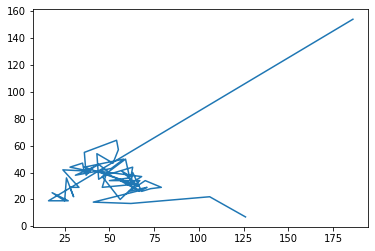

In [121]:
plt.plot(non_smoker,smoker)

__Q6b.__ Does it appear that uncertainty about the mean age of smokers, or uncertainty about the mean age of non-smokers contributed more to the uncertainty for the mean difference that we are focusing on here?